# Google Play Store - New Feature Lauch Analysis

**Project By : Gaurav Topre**

[My Portfolio](https://linktr.ee/gauravtopre)

### Objective :

> Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results.  This feature will help bring more attention to newer apps that have potential. 

>*The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the ﬁnal output of the analysis would be presented to business as insights with supporting data/visualizations.*

**Before Starting the Actual Analysis Let's first Understand the dataset**

### Importing Libraries

In [1]:
import pandas as pd #for dataframes
import numpy as np #for mathematical calculations
import seaborn as sns #visualization
import matplotlib.pyplot as plt #for Visualization

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [2]:
df = pd.read_csv('playstore-analysis (2) (1).csv')

*Checking Number of Rows and Columns Present*

In [3]:
df.shape

(10841, 13)

*Various Columns Present in Dataframe*

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

> These are the 13 Columns in the dataset

*Let's Check how our dataset looks*

In [5]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8002,Saiyan Of CW,FAMILY,3.8,5,1100.0,500+,Free,0,Everyone,Role Playing,"July 31, 2018",2.0.10,4.0.3 and up
8875,DT future1 cam,TOOLS,1.0,1,24000.0,50+,Free,0,Everyone,Tools,"March 27, 2018",3.1,2.2 and up
1142,Digit Save Money Automatically,FINANCE,4.5,8188,22000.0,"100,000+",Free,0,Everyone,Finance,"July 31, 2018",2.29.01,4.1 and up
7886,Remote CT - Smart Remote,TOOLS,3.5,3988,11000.0,"1,000,000+",Free,0,Everyone,Tools,"December 22, 2015",1.0.5,4.4 and up
3985,CURSUM B,GAME,NaN,30,26000.0,500+,Paid,$0.99,Everyone,Racing,"June 20, 2017",1.0.0,2.3 and up


## Data Cleanup : Missing Value Tratement 

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

> These are the number of null values present in each column

#### 1. We are going to drop the reccords where *RATING* is missing as RATING is our target

In [7]:
df = df[~(df['Rating'].isnull())]

In [8]:
df.shape

(9367, 13)

> We Have dropped the rows where we were havin null values for **Ratings**

**2. Checking Null Values for *Andriod Ver* Column**

In [9]:
df['Android Ver'].isnull().sum()

3

*2.1 Let's Check the Problem with these Records*

In [10]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


> **Observation:** Problem is not same for all 3 because 3rd value is mostly an improper entry for remaining two android version is not specified.

*2.2 Let's Delete Improper Entry (i.e. 'Life Made WI-Fi Touchscreen Photo Frame')*

In [11]:
df.drop(10472,inplace=True)

In [12]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


> We have Removed **'Life Made WI-Fi Touchscreen Photo Frame'** from data

*2.3 Replacing Remaining 2 NaN values*

- As the Android version is Categorical data so we will replace the null values with mode

In [13]:
df['Android Ver'].value_counts().sort_values(ascending = False)[0:1]

4.1 and up    2059
Name: Android Ver, dtype: int64

So we are having **4.1 and up** as the mode for **Andriod Ver** column

In [14]:
df['Android Ver'] = df['Android Ver'].fillna('4.1 and up')

In [15]:
df['Android Ver'].isnull().sum()

0

> **Output:** We have treated null values for *Android Ver.*

**3. Checking Null Values for *Current Ver* Column and Replacing with most Common Value**

In [16]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [17]:
Curr_ver_mode = df['Current Ver'].value_counts().index[0]
Curr_ver_mode

'Varies with device'

In [18]:
df['Current Ver'] = df['Current Ver'].fillna(Curr_ver_mode)

In [19]:
df['Current Ver'].isnull().sum()

0

> **Observation:** 

>There were 4 null values present in Current Version Column which we have replaced with the most common value i.e *'Varies with device'*

## Data Cleanup : Correcting Data Type

**1. Let's see which column we need to convert to numerical data type**

For this we will check **Data types** of each column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [21]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


> **Observations:** *Below are the columns which we need to convert into Numeric Datatype*

> **Reviews, Installs and Price**

**2. Price variable – remove '$' sign and convert to ﬂoat**

In [22]:
df['Price'] = df['Price'].str.replace('$','')

In [23]:
df['Price'] = df['Price'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


> **Observation:** We have removed '$' from Price and Converted it to **float**

**3. Installs – remove ‘,’ and ‘+’ sign, convert to integer**

In [25]:
df['Installs'] = df['Installs'].str.replace(',','') 

In [26]:
df['Installs'] = df['Installs'].str.replace('+','') 

In [27]:
df['Installs'] = df['Installs'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


**4. Converting all other identiﬁed columns to numeric**

In [29]:
df['Reviews'] = df['Reviews'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


> **Observation:** We have Converted 3 Columns to Numerical Data Type

## Sanity checks

**1. Avg Ratings : The Rating Value on Playstore lies between 1 to 5, So we will check are the ratings satisfying this condition if not we will drop them**

In [31]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [32]:
(df['Rating'].unique() <= 5) & (df['Rating'].unique() >= 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

> **Observation:** All the Rating values are in Range 1 to 5

**2. Reviews and Installs : Reviews should always be less than installs (lets check this condition)**

In [33]:
df[(df['Reviews']>df['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


*Yes These are 7 apps for which **Reviews** are greater than **Installs** .*

- We are going to drop Such Apps

In [34]:
df = df[~(df['Reviews']>df['Installs'])]

In [35]:
df.shape

(9359, 13)

 > **We have dropped those apps for which Ratings were greater than Installs (We did so because the person who had installed the app will only be allowed to give reviews)**

## Outlier Check

**1. Price Column**

In [36]:
df['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

*Huge Difference Between Thrird Quartile and Max Value is denoting the presence of Outliers*

[]

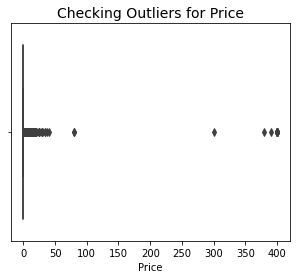

In [37]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Price'])
plt.title('Checking Outliers for Price', fontsize = 14)
plt.plot()

*We are having Few Extreme outliers As per the above plot*

- Generally Price of any APP does not go upto $200, Let's Check which are the apps for which we are getting this much Price

In [38]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


- These are the 15 Expensive 💸 Apps.
- We will ignore these Apps as generelly People will not prefer them due to the huge price.

In [39]:
df = df[~(df['Price']>200)]

In [40]:
df.shape

(9344, 13)

We will again check the outliers after removing these 15 Apps

[]

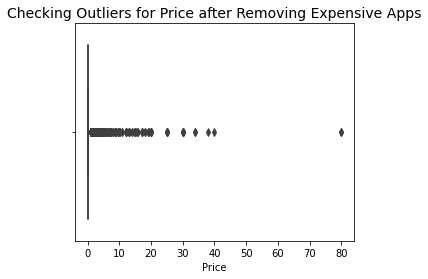

In [41]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Price'])
plt.title('Checking Outliers for Price after Removing Expensive Apps', fontsize = 14)
plt.plot()

- We will be Interested in Apps that **costs below $30**

In [42]:
df = df[df['Price']<30]

In [43]:
df.shape

(9338, 13)

> **Observation:**  We are left With 9338 Apps Which **costs below $30**

**2. Review Column**

In [44]:
df['Reviews'].describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

*This Column also Contains Few Outliers*

[]

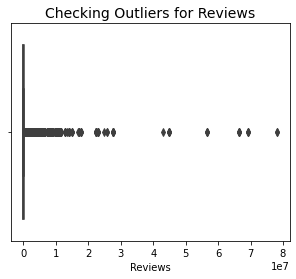

In [45]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Reviews'])
plt.title('Checking Outliers for Reviews', fontsize = 14)
plt.plot()

- Not Few We can See many Outliers in Reviews Columns 
- But We will be limiting the Reviews below 1M (10,00,000)

In [46]:
df[df['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


- There are 704 Apps which are having Reviews Greater than 1M 
- All these are Ouliers for us so we are going to drop them

In [47]:
df = df[df['Reviews']< 1000000]

> *We have Limited our data to the Reviews less than 10,00,000*

**3. Installs**

- Let's Calculate the 95th Percentile
- We are interested in data above 95th Percentile

In [48]:
per_95th =df.Installs.quantile(0.95)
per_95th

10000000.0

In [49]:
df = df[df.Installs<per_95th]

In [50]:
df.shape

(7258, 13)

> **Observation:** After doing this treatement we are left with 7258 Apps

## Data Analysis To Answer Business Questions

### We will See Distribution of Ratings

[]

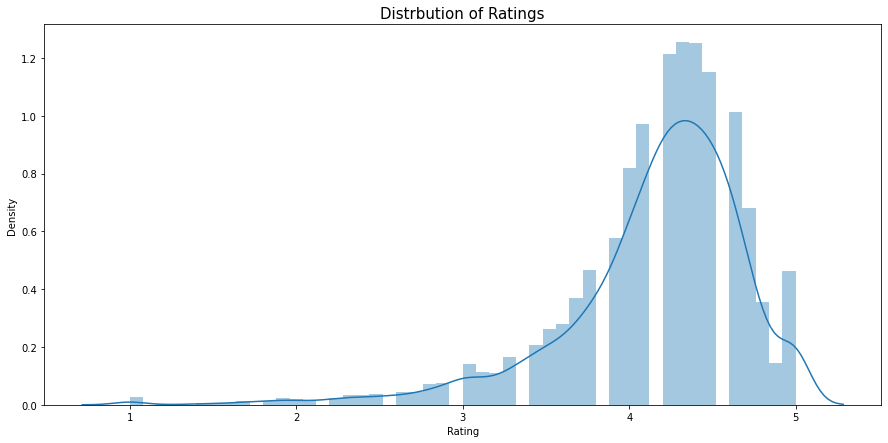

In [51]:
plt.figure(figsize=(15,7))
sns.distplot(df.Rating)
plt.title('Distrbution of Ratings', fontsize=15)
plt.plot()

> **Observations:** 
- The Data is Left Skewed which means the mean is typically LESS THAN the median. Such distribution is also called as Negatively Skewed
-  Most apps are rated between 3.5 to 4.8
> **This means that the maximum number of apps that are rated are Rated with Good Ratings**

### Top Content Rating Values

In [52]:
df['Content Rating'].value_counts()

Everyone           5913
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

[]

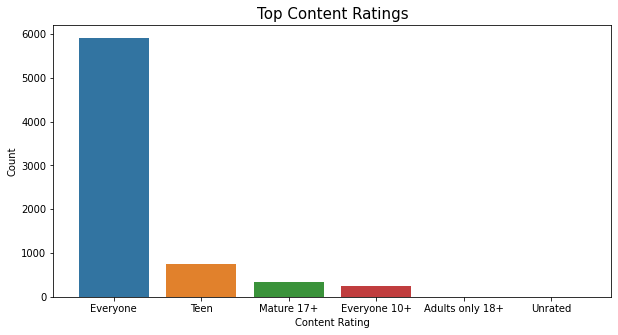

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(df['Content Rating'].value_counts().index, df['Content Rating'].value_counts().values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Top Content Ratings', fontsize = 15)
plt.plot()

> **Observation:** 
We have Rop Content Ratings from 'Everyone','Teen','Mature 17+' and 'Everyone 10+' Where as we are having only few from Adults only 18+ and Unrated 

We are going to drop **Unrated** and **Adults only 18+**

In [54]:
df[(df['Content Rating'] == 'Unrated') | (df['Content Rating'] =='Adults only 18+')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [55]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [56]:
df.shape

(7258, 13)

In [57]:
df = df[~((df['Content Rating'] == 'Unrated') | (df['Content Rating'] =='Adults only 18+'))]
df.shape

(7254, 13)

**We have Deleted the fewer count Content Ratings**

### Effect of Size on Ratings

In [58]:
df[['Size','Rating']].corr()

,Size,Rating
Size,1.000000,0.040777
Rating,0.040777,1.000000


[]

<Figure size 648x648 with 0 Axes>

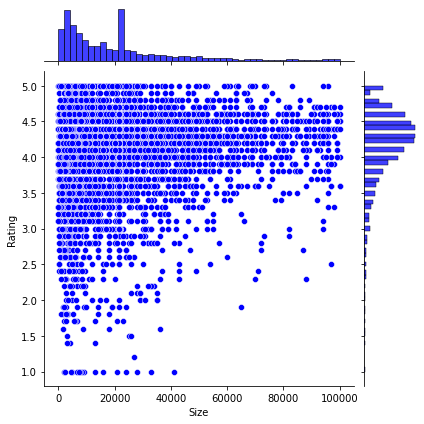

In [59]:
plt.figure(figsize=(9,9))
sns.jointplot(df.Size, df.Rating, color = 'b')
plt.plot()

> **Observation:**

- Yes we can clearly observe the pattern in Size and Ratings.
- We can see that the maximum apps are between 0 - 20000 in size.
- And as the size of app is increasing the number of lower ratings are less.
- As Size Increases we are getting heigher ratings.
- No app greater that 45000 in size got ratings below 1.5
- No app greater that 70000 in size got ratings below 2.0

### Effect of price on rating 

[]

<Figure size 648x648 with 0 Axes>

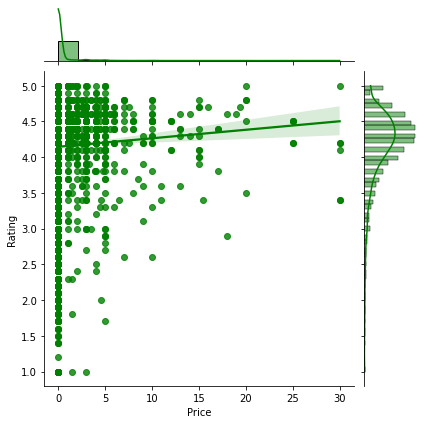

In [60]:
plt.figure(figsize=(9,9))
sns.jointplot(df['Price'], df.Rating, color = 'g',kind='reg')
plt.plot()

> **Observations**

* We are having all sort of ratings (0 to 5) for the Free apps.

* Looking at the regression Line we can say as Price Increases Ratings Generally are Increasing.

* Maximum Number of Ratings were given to the apps whose price lies betwwen Free to 5 Dollars.

* Regression Pattern on price axis tells us that maximum apps are either Free or are below 5 Dollars

* Ratings given mainly Lies between 3.5 to 4.5.

[]

<Figure size 648x648 with 0 Axes>

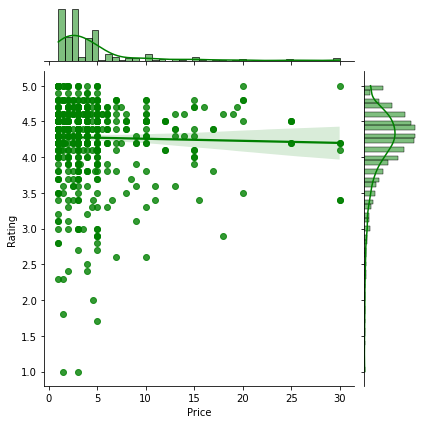

In [85]:
plt.figure(figsize=(9,9))
sns.jointplot(df[df['Price']>0]['Price'], df.Rating, color = 'g',kind='reg')
plt.plot()

> **Observation:**

**Yes ! Pattern in Price changed.**

* Earlier the price pattern was increasing but now it's decreasing

**Overall we can infer that if the individual is paying the ammount for the app then mostly they are rating the app high and very few Paid apps were rated low.**

###  Looking at all the numeric interactions together 

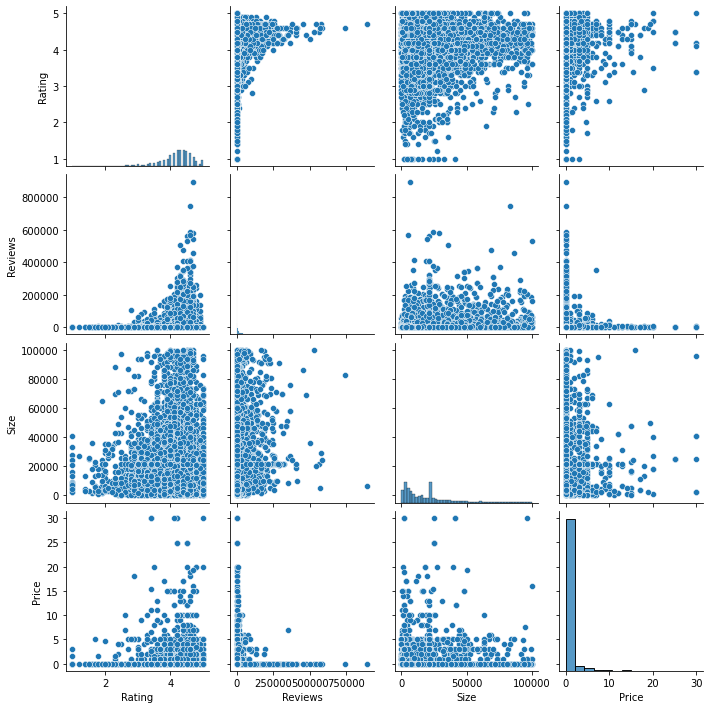

In [63]:
sns.pairplot(df.drop('Installs',axis=1))

### Rating vs. content rating 

**Making bar plot displaying the rating for each content rating**

> As Rating is Categorical Value so we are going to use **MEDIAN metric**

In [64]:
median_rating = df.groupby('Content Rating')['Rating'].median()

In [65]:
median_rating

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

[]

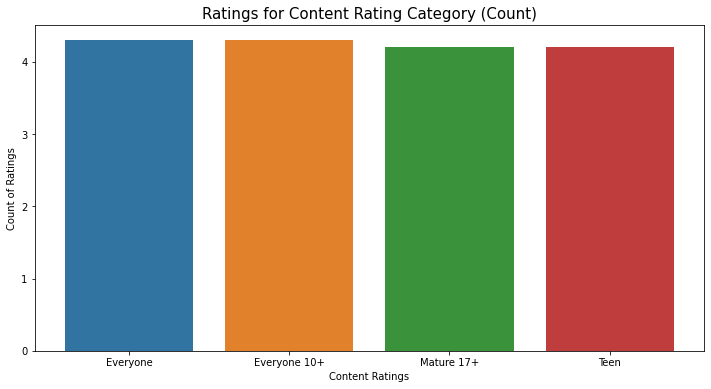

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(median_rating.index, median_rating.values)
plt.xlabel('Content Ratings')
plt.ylabel('Count of Ratings')
plt.title('Ratings for Content Rating Category (Count)', fontsize =15)
plt.plot()

In [67]:
rating_count  = df.groupby('Content Rating')['Rating'].size()

[]

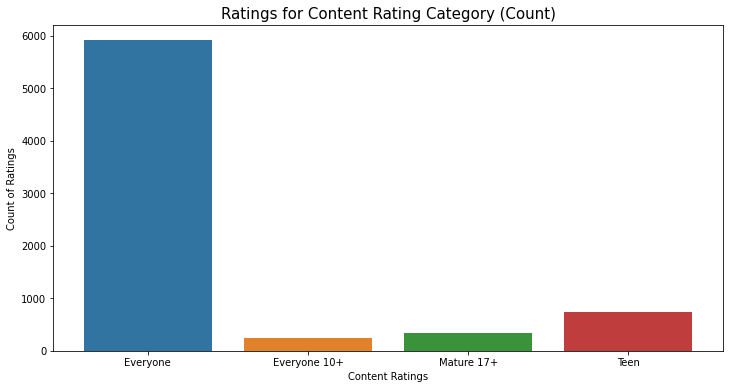

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(rating_count.index, rating_count.values)
plt.xlabel('Content Ratings')
plt.ylabel('Count of Ratings')
plt.title('Ratings for Content Rating Category (Count)', fontsize =15)
plt.plot()

### Content rating vs. size vs. rating – 3 variables at a time

In [69]:
df_binned = df.copy()

In [70]:
df_binned['Size_buckets'] = pd.qcut(df['Size'], q=5)

In [71]:
df_binned.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"(9800.0, 21516.53]"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,"(9800.0, 21516.53]"


In [72]:
df_binned['Size_buckets'].unique()

[(9800.0, 21516.53], (4100.0, 9800.0], (8.499, 4100.0], (21516.53, 31000.0], (31000.0, 100000.0]]
Categories (5, interval[float64, right]): [(8.499, 4100.0] < (4100.0, 9800.0] < (9800.0, 21516.53] < (21516.53, 31000.0] < (31000.0, 100000.0]]

> **Observation**

**Below are the 5 Buckets that we got after dividing data into 5 parts (20% each)**

* *Bucket One* : very Small size (8.499, 4100.0]
* *Bucket Two* : Small size (4100.0, 9800.0]
* *Bucket Three* : Medium Size (9800.0, 21516.53]
* *Bucket Four* : Large Size (21516.53, 31000.0]
* *Bucket Four* : Very Large Size (31000.0, 100000.0]

**Let's Include these Categories in our Data**

In [73]:
df_binned['Size_Cat'] = df_binned['Size_buckets']

In [74]:
df_binned['Size_Cat'] = df_binned['Size_Cat'].astype(str)

In [75]:
df_binned['Size_Cat'] = df_binned['Size_Cat'].replace({'(8.499, 4100.0]':'Very Small','(4100.0, 9800.0]':'Small','(9800.0, 21516.53]':'Medium','(21516.53, 31000.0]':'Large','(31000.0, 100000.0]':'Very Large' })

**We have Included an extra column named Size Category**

### Getting ratings of 20th Percentile of each Bucket

In [76]:
df_binned.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_buckets,Size_Cat
10179,Golden HoYeah Slots - Real Casino Slots,GAME,4.4,201537,68000.0,5000000,Free,0.0,Teen,Casino,"August 1, 2018",2.1.7,4.0.3 and up,"(31000.0, 100000.0]",Very Large


In [77]:
dbt = df_binned.groupby(['Content Rating','Size_Cat'])['Rating'].quantile(0.2).reset_index()

In [78]:
dbt.sample(5)

,Content Rating,Size_Cat,Rating
8,Everyone 10+,Very Large,3.9
0,Everyone,Large,3.8
4,Everyone,Very Small,3.7
10,Mature 17+,Large,3.9
18,Teen,Very Large,4.0


In [79]:
dbtp = dbt.pivot('Content Rating','Size_Cat','Rating')

In [80]:
dbtp

Size_Cat,Large,Medium,Small,Very Large,Very Small
Content Rating,,,,,
Everyone,3.8,3.9,3.80,3.8,3.70
Everyone 10+,4.1,4.1,3.84,3.9,3.74
Mature 17+,3.9,3.6,3.52,4.0,3.08
Teen,4.0,3.9,3.88,4.0,3.80


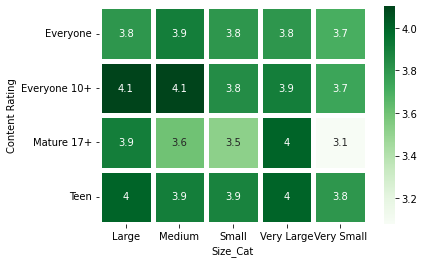

In [81]:
fig = sns.heatmap(dbtp, annot = True, linewidth = -5,cmap='Greens')

> **Observations**

- No Small Apps are the most popular in all Categories.
- It's the Large Apps which are that are prertered in almost all the categories.

## Final Points that we can Infer

**1. As the Size of App increases people Generaly give good ratings to these apps**
> This may be because the Large Size apps mostly Comes with great features and hence they attract people towards the exciting things.

**2. Paid Apps mainly the expensive apps have got good ratings**

**3. All Content Ratings got almost equal Ratings (used median Metric)**
